## Movie Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [2]:
credits_df= pd.read_csv(r"C:\Users\ende\Desktop\archive\tmdb_5000_credits.csv")
movies_df=pd.read_csv(r"C:\Users\ende\Desktop\archive\tmdb_5000_movies.csv")



In [3]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
credits_df.columns = ['id','tittle','cast','crew']
movies_df = movies_df.merge(credits_df, on="id")

In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# Demographic Filtering
C = movies_df["vote_average"].mean()
m = movies_df["vote_count"].quantile(0.9)

print("C: ", C)
print("m: ", m)

new_movies_df = movies_df.copy().loc[movies_df["vote_count"] >= m]
print(new_movies_df.shape)

C:  6.092171559442011
m:  1838.4000000000015
(481, 23)


In [8]:
def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]

    return (v/(v + m) * R) + (m/(v + m) * C)

In [9]:
new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)

new_movies_df[["title", "vote_count", "vote_average", "score"]].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


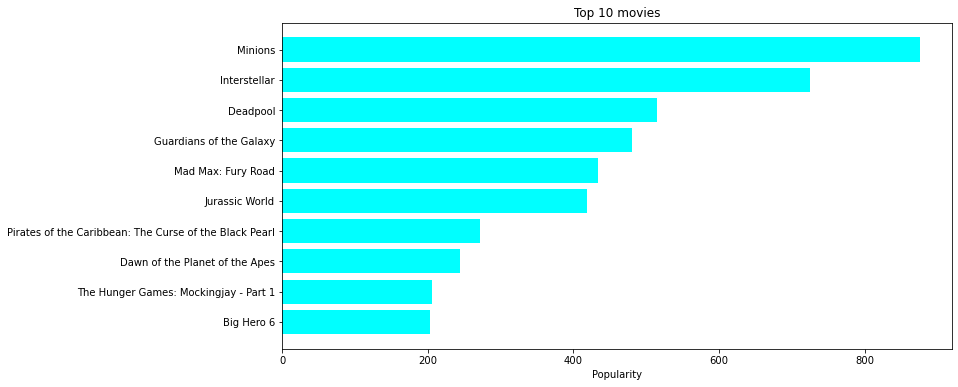

In [26]:
# Plot top 10 movies
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="cyan")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()
    

plot()

In [11]:
# Content based Filtering
print(movies_df["overview"].head(5))

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


In [12]:
tfidf = TfidfVectorizer(stop_words="english")
movies_df["overview"] = movies_df["overview"].fillna("")

tfidf_matrix = tfidf.fit_transform(movies_df["overview"])
print(tfidf_matrix.shape)

(4803, 20978)


In [13]:
# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

indices = pd.Series(movies_df.index, index=movies_df["title"]).drop_duplicates()
print(indices.head())

(4803, 4803)
title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [14]:
def get_recommendations(title, cosine_sim=cosine_sim):
    """
    in this function,
        we take the cosine score of given movie
        sort them based on cosine score (movie_id, cosine_score)
        take the next 10 values because the first entry is itself
        get those movie indices
        map those indices to titles
        return title list
    """
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # (a, b) where a is id of movie, b is sim_score

    movies_indices = [ind[0] for ind in sim_scores]
    movies = movies_df["title"].iloc[movies_indices]
    return movies

In [15]:
print("################ Content Based Filtering - plot#############")
print()
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises"))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers"))

################ Content Based Filtering - plot#############

Recommendations for The Dark Knight Rises
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

Recommendations for Avengers
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain

In [16]:
features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

movies_df[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [17]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [18]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [19]:
movies_df["director"] = movies_df["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [20]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [21]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ""

In [22]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [23]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])


movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [24]:
count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])

print(count_matrix.shape)

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim2.shape)

movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

(4803, 11520)
(4803, 4803)


In [25]:
print("################ Content Based System - metadata #############")
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises", cosine_sim2))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers", cosine_sim2))

################ Content Based System - metadata #############
Recommendations for The Dark Knight Rises
65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

Recommendations for Avengers
7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object


In [28]:
print("################ Content Based System - metadata #############")
print("Recommendations for The Man of Steel")
print(get_recommendations("Man of Steel", cosine_sim2))
print()
print("Recommendations for Man of Steel")
print(get_recommendations("Man of Steel", cosine_sim2))

################ Content Based System - metadata #############
Recommendations for The Man of Steel
9                   Batman v Superman: Dawn of Justice
10                                    Superman Returns
813                                           Superman
870                                        Superman II
41                                       Green Lantern
121     Night at the Museum: Battle of the Smithsonian
126                               Thor: The Dark World
1296                                      Superman III
1652                              Dragonball Evolution
2433                  Superman IV: The Quest for Peace
Name: title, dtype: object

Recommendations for Man of Steel
9                   Batman v Superman: Dawn of Justice
10                                    Superman Returns
813                                           Superman
870                                        Superman II
41                                       Green Lantern
121     Night 